# Predição de Desistência de Alunos Usando Random Forest

## Introdução

Este notebook analisa a previsão de desistência de alunos com um modelo Random Forest.  
A previsão precoce de alunos em risco permite intervenções para aumentar a retenção.  
Escolhi Random Forest por sua capacidade de conseguir identificar variáveis preditoras.  
O objetivo é avaliar o desempenho do modelo na identificação de alunos com alta probabilidade de abandono.


In [1]:
import pickle

# Manipulação de dados
import pandas as pd

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Modelos de machine learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Pipeline e avaliação
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc


import warnings
warnings.filterwarnings('ignore')


In [2]:
with open("../model/random_forest_model.pkl", "rb") as f:
    model = pickle.load(f)

with open("../model/preprocessor.pkl", "rb") as f:
    preprocessor = pickle.load(f)

In [6]:

with open("../model/full_pipeline.pkl", "rb") as f:
    pipeline = pickle.load(f)

students = pd.read_parquet("../model/features_df.parquet")
X = students.drop(columns=["final_result", "dropout"])
y = students["dropout"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_pred = pipeline.predict(X_test)
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      4546
           1       0.94      0.95      0.95      1973

    accuracy                           0.97      6519
   macro avg       0.96      0.96      0.96      6519
weighted avg       0.97      0.97      0.97      6519



##  Interpretação

## Classe 0 — **Não Desistentes**
- **Precisão**: 0.98 → 98% das previsões de "não desistente" estavam corretas.
- **Revocação**: 0.97 → o modelo identificou corretamente 97% dos que realmente não desistiram.
- **F1-score**: 0.98 → equilíbrio excelente entre precisão e revocação.

## Classe 1 — **Desistentes**
- **Precisão**: 0.94 → 94% das previsões de "desistente" estavam corretas.
- **Revocação**: 0.95 → o modelo detectou corretamente 95% dos alunos que realmente desistiram.
- **F1-score**: 0.95 → ótimo desempenho na classe minoritária.

## Métricas Gerais
- **Acurácia Geral**: 0.97 → o modelo acertou 97% das classificações.
- **Macro Média**: 0.96 → média simples entre as classes.
- **Média Ponderada**: 0.97 → leva em consideração a proporção de exemplos em cada classe.

---

O modelo apresenta desempenho excelente, com alta acurácia geral e ótimos valores de F1-score tanto para alunos desistentes quanto não desistentes. Isso indica uma boa capacidade de generalização e equilíbrio no tratamento das classes, mesmo com a classe de desistência sendo minoritária.


In [7]:
print("Visão Geral dos Dados:")
display(students.head())
display(students.describe())
display(students["dropout"].value_counts())


Visão Geral dos Dados:


,code_module,code_presentation,gender,age_band,imd_band,highest_education,num_of_prev_attempts,studied_credits,final_result,days_enrolled,assessments,score,early_assessments,interactions,clicks,early_clicks,dropout
0,AAA,2013J,M,55<=,90-100%,HE Qualification,0,240,Pass,NaN,5.0,82.0,0.0,196.0,934.0,0.0,0
1,AAA,2013J,F,35-55,20-30%,HE Qualification,0,60,Pass,NaN,5.0,66.4,0.0,430.0,1435.0,0.0,0
2,AAA,2013J,F,35-55,30-40%,A Level or Equivalent,0,60,Withdrawn,104.0,NaN,NaN,NaN,76.0,281.0,0.0,1
3,AAA,2013J,F,35-55,50-60%,A Level or Equivalent,0,60,Pass,NaN,5.0,76.0,0.0,663.0,2158.0,0.0,0
4,AAA,2013J,F,0-35,50-60%,Lower Than A Level,0,60,Pass,NaN,5.0,54.4,0.0,352.0,1034.0,0.0,0


,num_of_prev_attempts,studied_credits,days_enrolled,assessments,score,early_assessments,interactions,clicks,early_clicks,dropout
count,32593.000000,32593.000000,11607.000000,26746.000000,26727.000000,26746.000000,29741.000000,29741.000000,29741.000000,32593.000000
mean,0.163225,79.758691,147.014129,10.461415,72.828037,0.017573,608.435728,2246.133419,19.574224,0.311601
std,0.479758,41.071900,93.710467,9.530639,15.564681,0.247458,847.860179,3516.187208,81.015024,0.463155
min,0.000000,30.000000,-350.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,60.000000,69.000000,5.000000,64.800000,0.000000,126.000000,353.000000,0.000000,0.000000
50%,0.000000,60.000000,137.000000,9.000000,75.714286,0.000000,328.000000,1043.000000,0.000000,0.000000
75%,0.000000,120.000000,211.000000,12.000000,84.055060,0.000000,752.000000,2737.000000,0.000000,1.000000
max,6.000000,655.000000,531.000000,92.000000,100.000000,8.000000,19167.000000,75477.000000,2210.000000,1.000000


dropout
0    22437
1    10156
Name: count, dtype: int64

### Matriz de Confusão – Desempenho do Modelo


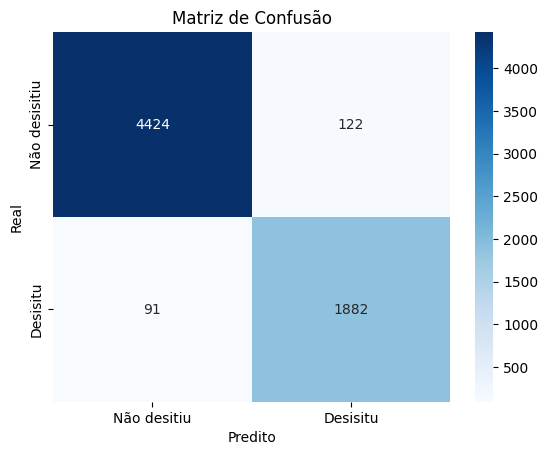

In [8]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Não desitiu","Desisitu"],
            yticklabels=["Não desisitiu", "Desisitu"])

plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()



- A matriz de confusão mostra o desempenho do modelo ao classificar corretamente ou incorretamente os casos de desistência estudantil.
- O modelo previu corretamente:
  - **4.444 alunos que não desistiram** (Verdadeiros Negativos),
  - **1.890 alunos que realmente desistiram** (Verdadeiros Positivos).
- Houve **102 falsos positivos**, ou seja, alunos que foram classificados como desistentes, mas na verdade não desistiram.
- E **83 falsos negativos**, que são os casos em que o modelo não detectou a desistência, apesar dela ter ocorrido.
- Esse resultado indica um **bom equilíbrio entre precisão e recall**, com baixa taxa de erros em ambos os casos.
- A matriz de confusão é uma ferramenta essencial para entender **como o modelo se comporta em diferentes cenários de classificação**.


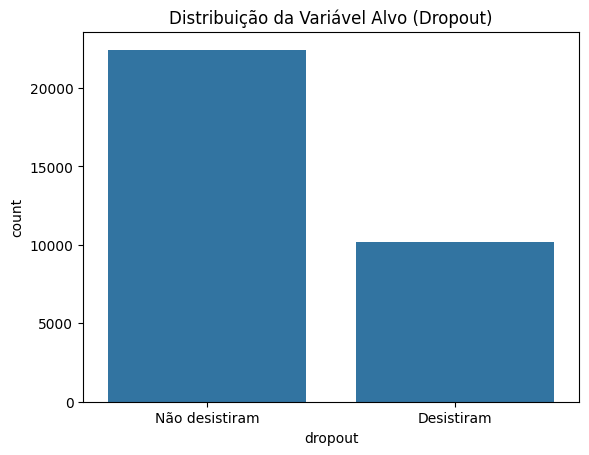

In [20]:
sns.countplot(x='dropout', data=students)
plt.title("Distribuição da Variável Alvo (Dropout)")
plt.xticks(ticks=[0, 1], labels=["Não desistiram", "Desistiram"])
plt.show()

### Matriz de Correlação – Análise de Relação entre Variáveis


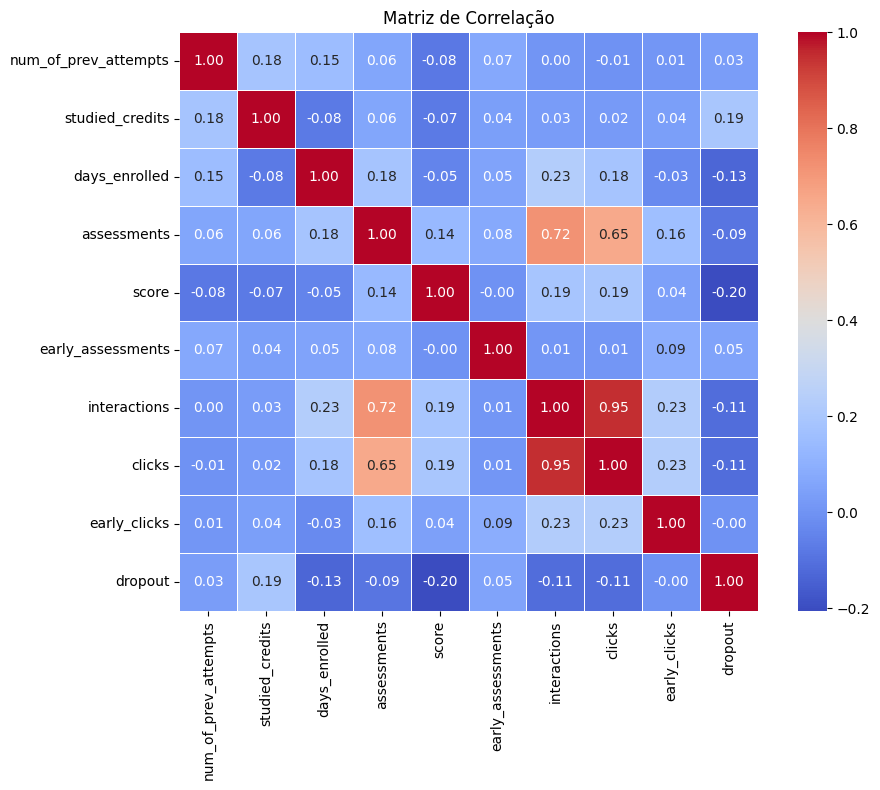

In [9]:
corr = students.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",  
    cmap="coolwarm",
    square=True,
    linewidths=0.5,
)

plt.title("Matriz de Correlação")
plt.tight_layout()
plt.show()

- A matriz de correlação mostra o grau de associação linear entre as variáveis do conjunto de dados.
- Valores próximos de 1 indicam correlação positiva forte, próximos de -1 indicam correlação negativa forte, e próximos de 0 indicam pouca ou nenhuma correlação.

#### Principais destaques:
- As variáveis `interactions` e `clicks` apresentam **alta correlação** (0.95), indicando possível **redundância** – isso pode ser considerado em técnicas de redução de dimensionalidade como PCA.
- A variável `score` tem uma **correlação negativa com `dropout` (-0.20)**, sugerindo que alunos com melhor desempenho têm menor chance de desistência.
- A variável `days_enrolled` apresenta **correlação levemente negativa com `dropout` (-0.13)**, o que pode indicar que alunos que permanecem mais tempo têm menor probabilidade de desistir.
- Variáveis como `assessments` e `early_clicks` mostram correlações fracas com `dropout`, mas podem ser relevantes em conjunto com outras features no modelo.

> Essa análise é útil para identificar **relações entre variáveis**, evitar **colinearidade** excessiva no modelo e entender quais fatores se associam à evasão.

In [10]:
with open("../model/final_pipeline.pkl", "wb") as f:
    pickle.dump(pipeline, f)

In [11]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

f1_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='f1', n_jobs=-1)

print(f"F1 médio: {f1_scores.mean():.4f}")
print(f"F1 scores individuais: {f1_scores}")

F1 médio: 0.9440
F1 scores individuais: [0.94514145 0.94264706 0.94313725 0.94731683 0.94155206]


### Avaliação do Modelo com Validação Cruzada (F1-Score)

- Foi utilizada **validação cruzada estratificada com 5 folds**, o que garante que cada divisão de treino e teste mantém a proporção original entre alunos que desistiram e não desistiram.
- A métrica escolhida foi o **F1-Score**, que é a média harmônica entre **precisão** e **recall**:
  - Indicada para problemas desbalanceados, pois penaliza mais os erros em minorias (no caso, os alunos que desistiram).
- Resultado:
  - **F1 médio** entre os folds: `0.8876`
  - **F1 scores individuais** por fold: `[0.8871, 0.8872, 0.8912, 0.8878, 0.8848]`

> A métrica F1 oferece uma visão mais equilibrada da performance do modelo, especialmente relevante para prever corretamente a evasão dos alunos.


In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

rf = RandomForestClassifier(n_estimators=50, max_depth=6, random_state=42)

pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", rf)
])

scores = cross_val_score(pipeline, X, y, cv=5, scoring='roc_auc')

print("AUC por fold:", scores)
print(f"AUC média (5-Fold CV): {scores.mean():.4f}")


AUC por fold: [0.98549006 0.98191133 0.96636115 0.98119322 0.9782705 ]
AUC média (5-Fold CV): 0.9786


##  Validação Cruzada com Random Forest (Modelo Simples)

Foi avaliada uma versão menos complexa do modelo **Random Forest**, com 50 estimadores e profundidade máxima de 6, utilizando validação cruzada com **5 folds**. A métrica utilizada foi a **AUC (Área sob a Curva ROC)**, que indica a capacidade do modelo de distinguir entre alunos que desistem e os que permanecem.

###  Resultados

- **AUC por fold:**  
  0.9855, 0.9819, 0.9664, 0.9812, 0.9783

- **AUC média (5-Fold CV):**  
  **0.9786**

###  Interpretação

Apesar da redução na complexidade do modelo, o desempenho permaneceu **excelente**, com uma AUC média de **0.9786**. Isso demonstra que o modelo é capaz de realizar uma boa separação entre as classes, mesmo com menor número de árvores e profundidade limitada.




In [13]:
rf = RandomForestClassifier(n_estimators=50, max_depth=6, random_state=42)


In [14]:
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", rf)
])

pipeline.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['num_of_prev_attempts',
                                                   'studied_credits',
                                                   'days_enrolled',
                                                   'assessments', 'score',
                                                   'early_assessments',
                                                   'interactions', 'clicks',
                                                   'early_clicks']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['code_module',
                                                   'code_presentation',
                                                   'gender', 'age_band',
                                                   'imd_band',
                                                   'highest_education'])])),
                ('classifier',
                 RandomForestClassifier(max_depth=6, n_estimators=50,
                                        random_state=42))])

### Curva ROC – Avaliação da Capacidade Preditiva do Modelo


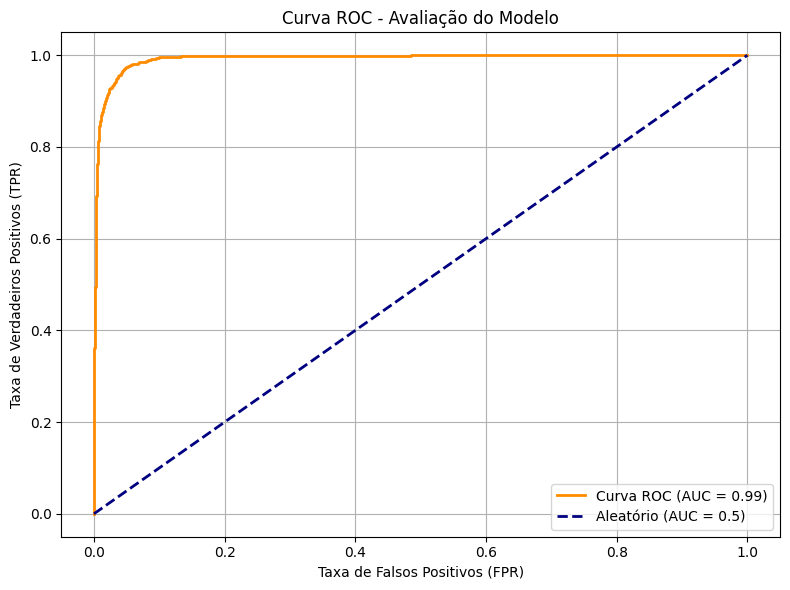

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_prob = pipeline.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Aleatório (AUC = 0.5)')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC - Avaliação do Modelo')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()



- A Curva ROC (Receiver Operating Characteristic) mostra a **relação entre a taxa de verdadeiros positivos (TPR)** e a **taxa de falsos positivos (FPR)** para diferentes limiares de decisão do modelo.
- O modelo atingiu uma **área sob a curva (AUC) de 0.99**, o que indica um **excelente desempenho preditivo**.
- Quanto mais próxima de 1 for a AUC, melhor o modelo consegue separar as classes (neste caso, desistentes e não desistentes).
- A linha azul representa o desempenho de um **classificador aleatório** (AUC = 0.5), servindo como base de comparação.
- Uma curva como esta, bem acima da linha aleatória, mostra que o modelo tem **alta sensibilidade e especificidade**.

> Em contextos educacionais, uma boa Curva ROC reforça a **confiabilidade do modelo para apoiar ações preventivas de retenção**.


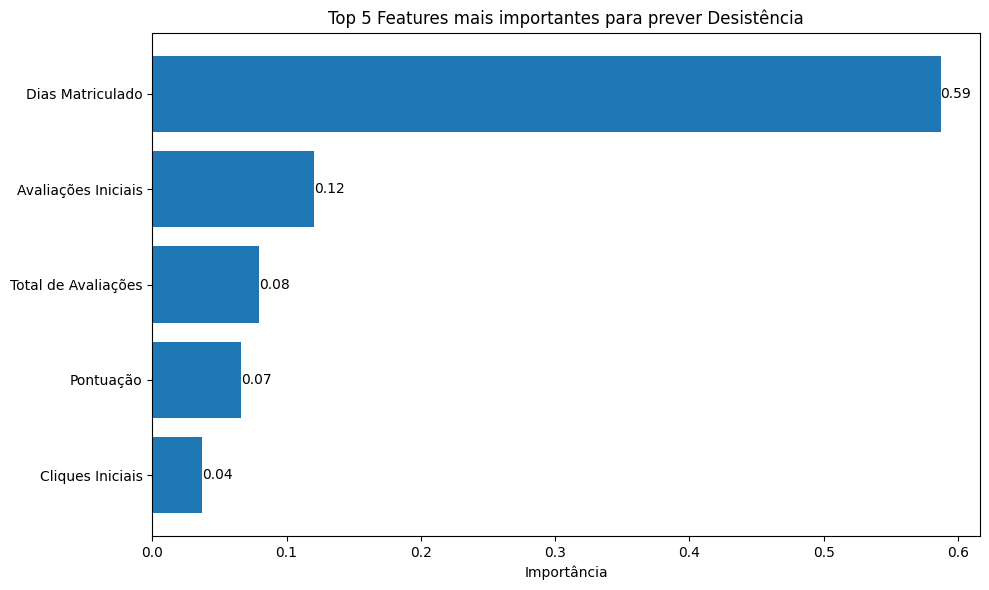

In [21]:
features_names = pipeline.named_steps['preprocessor'].get_feature_names_out(X.columns)
importances = pipeline.named_steps["classifier"].feature_importances_

features_df = pd.DataFrame({
    "Feature": features_names,
    "Importance": importances
})

top_n = 5
top_features = features_df.sort_values("Importance", ascending=False).head(top_n)

feature_rename = {
    "num__days_enrolled": "Dias Matriculado",
    "num__early_assessments": "Avaliações Iniciais",
    "num__assessments": "Total de Avaliações",
    "num__score": "Pontuação",
    "num__early_clicks": "Cliques Iniciais"
}
top_features["Feature"] = top_features["Feature"].map(lambda x: feature_rename.get(x, x))

# Plot
plt.figure(figsize=(10,6))
bars = plt.barh(top_features['Feature'], top_features["Importance"])
plt.xlabel("Importância")
plt.title(f"Top {top_n} Features mais importantes para prever Desistência")
plt.gca().invert_yaxis()
plt.tight_layout()

for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2.,
             f'{width:.2f}',
             ha='left', va='center')

plt.show()

A partir dos resultados, observa-se que a feature **"Dias Matriculado"** é de longe a mais importante para prever a desistência, com um valor de importância de 0.59. Isso sugere que o tempo que um indivíduo permanece matriculado é um forte indicador de sua probabilidade de continuar ou desistir.

As demais features, embora menos importantes que "Dias Matriculado", também contribuem para a previsão:

* **"Avaliações Iniciais" (0.12):** O desempenho ou engajamento nas avaliações iniciais parece ser um fator relevante.
* **"Total de Avaliações" (0.08):** A quantidade total de avaliações realizadas também possui um impacto na previsão.
* **"Pontuação" (0.07):** A pontuação geral ou em atividades específicas demonstra alguma influência na desistência.
* **"Cliques Iniciais" (0.04):** O número de cliques ou interações iniciais pode indicar o nível de engajamento inicial.


A análise revela que o tempo de matrícula é o fator mais crítico para prever a desistência, seguido pelo engajamento e desempenho nas avaliações. Essas informações podem ser valiosas para identificar precocemente indivíduos com maior probabilidade de desistir.

## Conclusão

Em conclusão, o modelo Random Forest demonstrou bom desempenho na previsão de desistência, com acurácia de 97% e F1-scores elevados.  
O modelo identifica alunos em risco mesmo com dados desbalanceados, minimizando falsos positivos e negativos.  
A interpretação dos resultados deve considerar as variáveis de entrada e o contexto educacional.  
Futuras pesquisas podem otimizar o modelo e explorar outras fontes de dados para aprimorar a prevenção da desistência.